In [37]:
import pandas as pd

In [38]:
df = pd.read_excel("d:\Курсова\Курсова 2021\SSE output 1.xlsx")

In [39]:
df.head()

,Date,Y,Prediction 1,Prediction 2,Prediction 3,Close
0,2016-09-07,1,0.548215,0.583426,0.568505,3091.927979
1,2016-09-08,0,0.545550,0.546711,0.556873,3095.954102
2,2016-09-09,0,0.597661,0.637866,0.637935,3078.854980
3,2016-09-12,1,0.451807,0.460114,0.464460,3021.977051
4,2016-09-13,0,0.476798,0.469531,0.500643,3023.510010


In [40]:
signal_1 = []

for i in range(len(df["Y"])):
    if df["Prediction 1"][i] > 0.5:
        signal_1.append(1)
    else:
        signal_1.append(0)

In [41]:
print(len(signal_1))
print(len(df["Y"]))

1095
1095


In [42]:
df["Signal 1"] = signal_1
df.head()

,Date,Y,Prediction 1,Prediction 2,Prediction 3,Close,Signal 1
0,2016-09-07,1,0.548215,0.583426,0.568505,3091.927979,1
1,2016-09-08,0,0.545550,0.546711,0.556873,3095.954102,1
2,2016-09-09,0,0.597661,0.637866,0.637935,3078.854980,1
3,2016-09-12,1,0.451807,0.460114,0.464460,3021.977051,0
4,2016-09-13,0,0.476798,0.469531,0.500643,3023.510010,0


In [43]:
df.tail()

,Date,Y,Prediction 1,Prediction 2,Prediction 3,Close,Signal 1
1090,2021-03-10,1,0.552594,0.548688,0.549600,3357.739990,1
1091,2021-03-11,1,0.461440,0.463533,0.474671,3436.830078,0
1092,2021-03-12,0,0.458638,0.462697,0.470627,3453.080078,0
1093,2021-03-15,1,0.463992,0.464542,0.477998,3419.949951,0
1094,2021-03-16,0,0.471349,0.467297,0.486586,3446.732910,0


In [44]:
signal_2 = []
for i in range(len(df["Y"])):
    if df["Prediction 2"][i] > 0.5:
        signal_2.append(1)
    else:
        signal_2.append(0)
        
signal_3 = []
for i in range(len(df["Y"])):
    if df["Prediction 3"][i] > 0.5:
        signal_3.append(1)
    else:
        signal_3.append(0)

In [45]:
print(len(signal_2))
print(len(signal_3))
print(len(df["Y"]))

1095
1095
1095


In [46]:
df["Signal 2"] = signal_2
df["Signal 3"] = signal_3
df.head()

,Date,Y,Prediction 1,Prediction 2,Prediction 3,Close,Signal 1,Signal 2,Signal 3
0,2016-09-07,1,0.548215,0.583426,0.568505,3091.927979,1,1,1
1,2016-09-08,0,0.545550,0.546711,0.556873,3095.954102,1,1,1
2,2016-09-09,0,0.597661,0.637866,0.637935,3078.854980,1,1,1
3,2016-09-12,1,0.451807,0.460114,0.464460,3021.977051,0,0,0
4,2016-09-13,0,0.476798,0.469531,0.500643,3023.510010,0,0,1


In [47]:
df.tail()

,Date,Y,Prediction 1,Prediction 2,Prediction 3,Close,Signal 1,Signal 2,Signal 3
1090,2021-03-10,1,0.552594,0.548688,0.549600,3357.739990,1,1,1
1091,2021-03-11,1,0.461440,0.463533,0.474671,3436.830078,0,0,0
1092,2021-03-12,0,0.458638,0.462697,0.470627,3453.080078,0,0,0
1093,2021-03-15,1,0.463992,0.464542,0.477998,3419.949951,0,0,0
1094,2021-03-16,0,0.471349,0.467297,0.486586,3446.732910,0,0,0


In [48]:
def trading_results(price, signal):
    results=["n/a" for i in range(len(price))]
    open_short, close_short, open_long, close_long = 0, 0, 0, 0
    
    
    for i in range(1,len(signal)):
        
        if signal[i] == 0 and signal[i-1] == 1:
            open_short = i
            close_long = i
            #рахуємо прибутковість довгої позиції
#             result = (price[close_long] - price[open_long])/price[open_long]
            result = (price[close_long] - price[open_long])/price[open_long] - 0.048/100
            results[i] = result
            
        if signal[i] == 1 and signal[i-1] == 0:
            close_short = i
            open_long = i
            #рахуємо прибутковість короткої позиції
#             result = -(price[close_short] - price[open_short])/price[open_short]
            result = -(price[close_short] - price[open_short])/price[open_short] - 0.048/100
            results[i] = result
            
    return(results)

In [49]:
results_1_SP = trading_results(df["Close"], df["Signal 1"])
results_2_SP = trading_results(df["Close"], df["Signal 2"])
results_3_SP = trading_results(df["Close"], df["Signal 3"])

# for element in results_1_SP:
#     print(element)

In [50]:
for i in range(len(results_1_SP)):
    if results_1_SP[i] != 'n/a':
        results_1_SP[i] = results_1_SP[i]*100
        
for i in range(len(results_2_SP)):
    if results_2_SP[i] != 'n/a':
        results_2_SP[i] = results_2_SP[i]*100
        
for i in range(len(results_3_SP)):
    if results_3_SP[i] != 'n/a':
        results_3_SP[i] = results_3_SP[i]*100

In [51]:
# for element in results_1_SP:
#     print(element)

In [52]:
amount_1 = []
amount_ = 100
for element in results_1_SP:
    if element != 'n/a':
        amount_ = amount_*(1+element/100)
        amount_1.append(amount_)
    else:
        amount_1.append(element)

amount_1[0] = 100

amount_2 = []
amount_ = 100
for element in results_2_SP:
    if element != 'n/a':
        amount_ = amount_*(1+element/100)
        amount_2.append(amount_)
    else:
        amount_2.append(element)

amount_2[0] = 100

amount_3 = []
amount_ = 100
for element in results_3_SP:
    if element != 'n/a':
        amount_ = amount_*(1+element/100)
        amount_3.append(amount_)
    else:
        amount_3.append(element)

amount_3[0] = 100

In [53]:
# for _ in amount:
#     print(_)

In [54]:
for i in range(len(amount_1)):
    if amount_1[i] != 'n/a':
        remember = amount_1[i]
    else:
        amount_1[i] = remember    
        
for i in range(len(amount_2)):
    if amount_2[i] != 'n/a':
        remember = amount_2[i]
    else:
        amount_2[i] = remember
        
for i in range(len(amount_3)):
    if amount_3[i] != 'n/a':
        remember = amount_3[i]
    else:
        amount_3[i] = remember

In [55]:
# for _ in amount:
#     print(_)

amount - список результатів (початкове значення - 100)
results_1_SP - прибуток (збиток) від кожної окремої позиції у відсотках

In [56]:
# amount = 100
# amount = amount*(1+results_1_SP[0])
# print(amount)

In [57]:
# for i in range (1, len(results_1_SP)):
#     amount = amount*(1+results_1_SP[i])
#     print(amount)

In [58]:
df["Results 1"] = amount_1
df["Results 2"] = amount_2
df["Results 3"] = amount_3

In [59]:
df.head()

,Date,Y,Prediction 1,Prediction 2,Prediction 3,Close,Signal 1,Signal 2,Signal 3,Results 1,Results 2,Results 3
0,2016-09-07,1,0.548215,0.583426,0.568505,3091.927979,1,1,1,100.000000,100.000000,100.000000
1,2016-09-08,0,0.545550,0.546711,0.556873,3095.954102,1,1,1,100.000000,100.000000,100.000000
2,2016-09-09,0,0.597661,0.637866,0.637935,3078.854980,1,1,1,100.000000,100.000000,100.000000
3,2016-09-12,1,0.451807,0.460114,0.464460,3021.977051,0,0,0,97.689628,97.689628,97.689628
4,2016-09-13,0,0.476798,0.469531,0.500643,3023.510010,0,0,1,97.689628,97.689628,97.593181


In [60]:
df.tail()

,Date,Y,Prediction 1,Prediction 2,Prediction 3,Close,Signal 1,Signal 2,Signal 3,Results 1,Results 2,Results 3
1090,2021-03-10,1,0.552594,0.548688,0.549600,3357.739990,1,1,1,120.234763,81.839639,108.346645
1091,2021-03-11,1,0.461440,0.463533,0.474671,3436.830078,0,0,0,120.718943,82.169204,108.782953
1092,2021-03-12,0,0.458638,0.462697,0.470627,3453.080078,0,0,0,120.718943,82.169204,108.782953
1093,2021-03-15,1,0.463992,0.464542,0.477998,3419.949951,0,0,0,120.718943,82.169204,108.782953
1094,2021-03-16,0,0.471349,0.467297,0.486586,3446.732910,0,0,0,120.718943,82.169204,108.782953


Text(0.5, 1.0, 'Прибутковість стратегії №1 (індекс Nikkei225)')

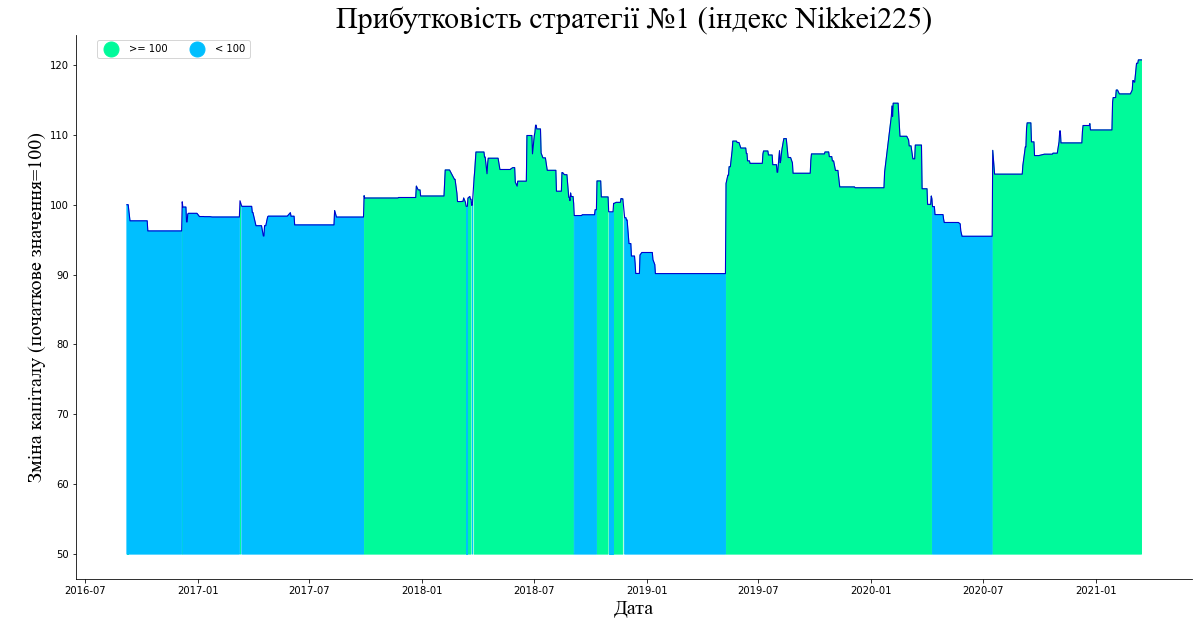

In [61]:
from matplotlib import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

font = {'fontname' : 'Times New Roman', 'size' : 20}

plt.figure(figsize=(20,10))

ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines["right"].set_visible(False)

plt.plot(df["Date"], df["Results 1"], color='mediumblue', linewidth=1.1)

plt.fill_between(df["Date"], [50 for i in range(len(df["Date"]))], df["Results 1"], where=df["Results 1"]>=100, 
                 color='mediumspringgreen')
plt.fill_between(df["Date"], [50 for i in range(len(df["Date"]))], df["Results 1"], where=df["Results 1"]<=100, 
                 color='deepskyblue')

colors = ['mediumspringgreen', 'deepskyblue']
texts = [">= 100", "< 100"]
patches = [ plt.plot([],[], marker="o", ms=15, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.16, 1), 
           ncol=2, numpoints=1 )

plt.ylabel('\nЗміна капіталу (початкове значення=100)', **font)
plt.xlabel('Дата', **font)
plt.title('Прибутковість стратегії №1 (індекс Nikkei225)', {'fontname' : 'Times New Roman', 'size' : 30})

# plt.savefig("Nikkei2251.jpg")
# plt.close()

Text(0.5, 1.0, 'Прибутковість стратегії №2 (індекс Nikkei225)')

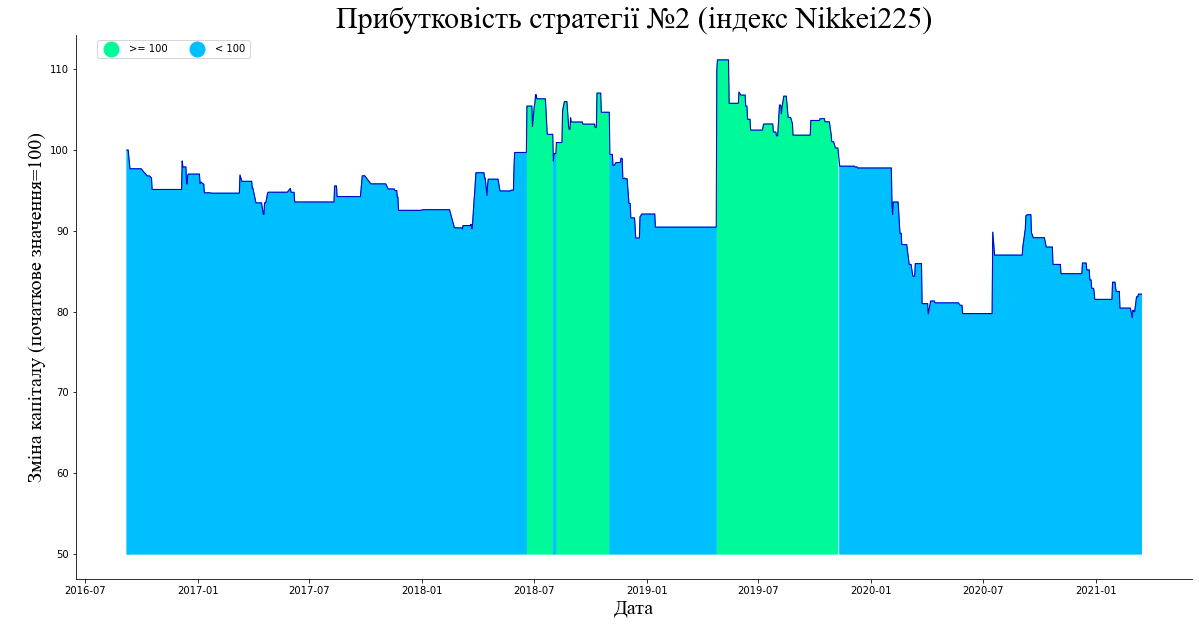

In [62]:
font = {'fontname' : 'Times New Roman', 'size' : 20}

plt.figure(figsize=(20,10))

ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines["right"].set_visible(False)

plt.plot(df["Date"], df["Results 2"], color='mediumblue', linewidth=1.1)

plt.fill_between(df["Date"], [50 for i in range(len(df["Date"]))], df["Results 2"], where=df["Results 2"]>=100, 
                 color='mediumspringgreen')
plt.fill_between(df["Date"], [50 for i in range(len(df["Date"]))], df["Results 2"], where=df["Results 2"]<=100, 
                 color='deepskyblue')

colors = ['mediumspringgreen', 'deepskyblue']
texts = [">= 100", "< 100"]
patches = [ plt.plot([],[], marker="o", ms=15, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.16, 1), 
           ncol=2, numpoints=1 )

plt.ylabel('\nЗміна капіталу (початкове значення=100)', **font)
plt.xlabel('Дата', **font)
plt.title('Прибутковість стратегії №2 (індекс SSE)', {'fontname' : 'Times New Roman', 'size' : 30})

# plt.savefig("Nikkei2252.jpg")
# plt.close()

Text(0.5, 1.0, 'Прибутковість стратегії №3 (індекс Nikkei225)')

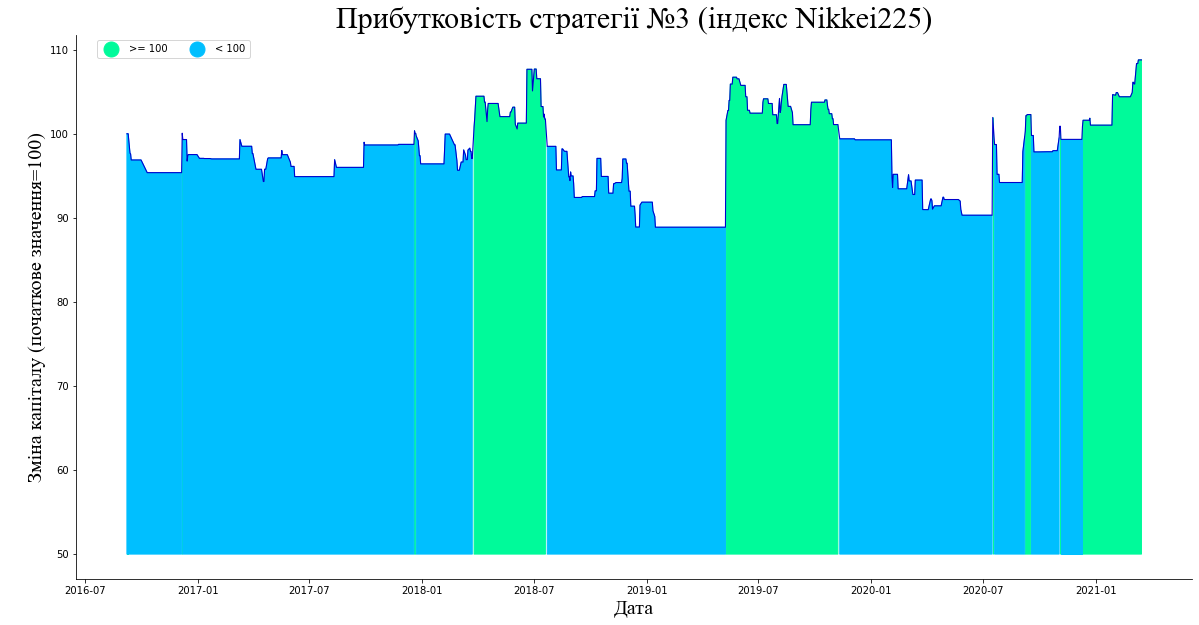

In [63]:
font = {'fontname' : 'Times New Roman', 'size' : 20}

plt.figure(figsize=(20,10))

ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines["right"].set_visible(False)

plt.plot(df["Date"], df["Results 3"], color='mediumblue', linewidth=1.1)

plt.fill_between(df["Date"], [50 for i in range(len(df["Date"]))], df["Results 3"], where=df["Results 3"]>=100, 
                 color='mediumspringgreen')
plt.fill_between(df["Date"], [50 for i in range(len(df["Date"]))], df["Results 3"], where=df["Results 3"]<=100, 
                 color='deepskyblue')

colors = ['mediumspringgreen', 'deepskyblue']
texts = [">= 100", "< 100"]
patches = [ plt.plot([],[], marker="o", ms=15, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.16, 1), 
           ncol=2, numpoints=1 )

plt.ylabel('\nЗміна капіталу (початкове значення=100)', **font)
plt.xlabel('Дата', **font)
plt.title('Прибутковість стратегії №3 (індекс SSE)', {'fontname' : 'Times New Roman', 'size' : 30})

# plt.savefig("Nikkei2253.jpg")
# plt.close()

In [64]:
results_1_SP = list(filter(lambda a: a != 'n/a', results_1_SP))
results_2_SP = list(filter(lambda a: a != 'n/a', results_2_SP))
results_3_SP = list(filter(lambda a: a != 'n/a', results_3_SP))

In [65]:
print(amount_1[len(amount_1)-1]-100)
print((df["Close"][len(df["Close"])-1]/df["Close"][0]-1)*100)
print(max(amount_1))
print(min(amount_1))
print(len(results_1_SP))
print(max(results_1_SP))
print(min(results_1_SP))

20.718943471935148
11.47520039619292
120.71894347193515
90.13972089825067
177
14.30283504359225
-5.762049690616333


In [66]:
print(amount_2[len(amount_2)-1]-100)
print((df["Close"][len(df["Close"])-1]/df["Close"][0]-1)*100)
print(max(amount_2))
print(min(amount_2))
print(len(results_2_SP))
print(max(results_2_SP))
print(min(results_2_SP))

-17.830795665856144
11.47520039619292
111.16178177019081
79.24157648520044
161
21.48533359295518
-5.762049690616333


In [67]:
print(amount_3[len(amount_3)-1]-100)
print((df["Close"][len(df["Close"])-1]/df["Close"][0]-1)*100)
print(max(amount_3))
print(min(amount_3))
print(len(results_3_SP))
print(max(results_3_SP))
print(min(results_3_SP))

8.782953106703886
11.47520039619292
108.78295310670389
88.88270330072466
185
14.30283504359225
-4.468508754101514
